# Import Packages

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX  
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Read the dataset

In [92]:
df_rose = pd.read_csv("Rose.csv")
df_rose.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [93]:
# Execute the columns name

In [94]:
df_rose.columns

Index(['YearMonth', 'Rose'], dtype='object')

## Change dtype of date to datetime

In [95]:
# Change dtype of date to datetime
df_rose['YearMonth'] = pd.to_datetime(df_rose['YearMonth'])
df_rose.head(5)

,YearMonth,Rose
0,1980-01-01,112.0
1,1980-02-01,118.0
2,1980-03-01,129.0
3,1980-04-01,99.0
4,1980-05-01,116.0


In [96]:
df_rose['YearMonth'] = pd.to_datetime(df_rose['YearMonth'])
df_rose = df_rose.sort_values(by='YearMonth')
df_rose

print("Period covered in dataset:", df_rose['YearMonth'].min() ,'to', df_rose['YearMonth'].max())

Period covered in dataset: 1980-01-01 00:00:00 to 1995-07-01 00:00:00


In [97]:
df_rose

,YearMonth,Rose
0,1980-01-01,112.0
1,1980-02-01,118.0
2,1980-03-01,129.0
3,1980-04-01,99.0
4,1980-05-01,116.0
...,...,...
182,1995-03-01,45.0
183,1995-04-01,52.0
184,1995-05-01,28.0
185,1995-06-01,40.0


In [98]:
# set date as index 
df_rose_ti = df_rose.set_index('YearMonth')
df_rose_ti

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0


<AxesSubplot:xlabel='YearMonth'>

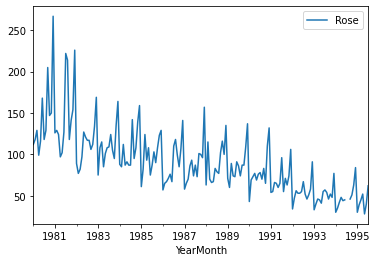

In [99]:
df_rose_ti.plot()

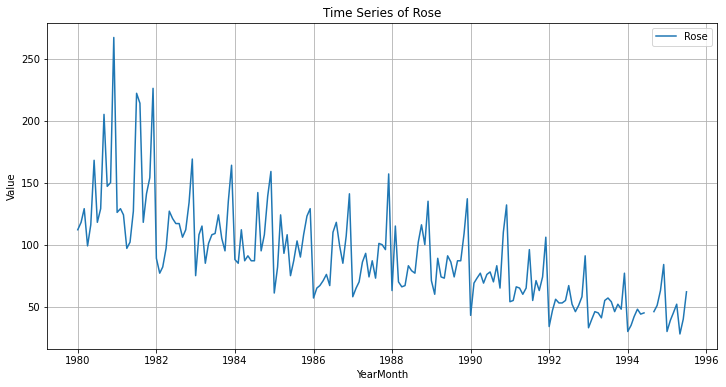

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is already loaded into a DataFrame `df`
# If YearMonth is the index, no need to parse dates again

plt.figure(figsize=(12, 6))
plt.plot(df_rose_ti.index, df_rose_ti['Rose'], label='Rose')
plt.title('Time Series of Rose')
plt.xlabel('YearMonth')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


In [101]:
# Basic statistics
summary_stats = df_rose_ti.describe()
print(summary_stats)


             Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000


## Plotting Rolling Statistics
## We can plot rolling statistics like the moving average and moving standard deviation to observe the trend and variability

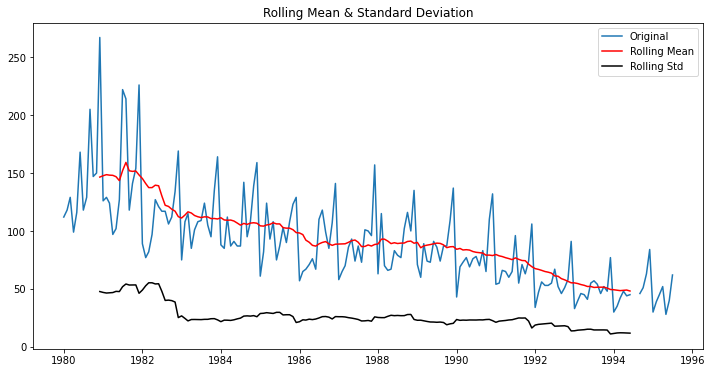

In [102]:
# Rolling statistics (e.g., 12-month window)
rolling_mean = df_rose_ti['Rose'].rolling(window=12).mean()
rolling_std = df_rose_ti['Rose'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(df_rose_ti['Rose'], label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.show()


## Plot the sales over every year

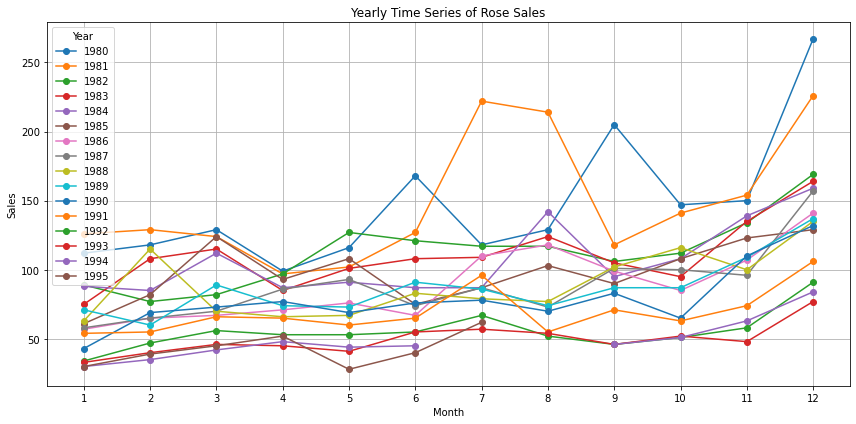

In [103]:
# Plotting
plt.figure(figsize=(12, 6))

# Assuming the data spans multiple years, we group by year and plot each group
for year, group in df_rose_ti.groupby(df_rose_ti.index.year):
    plt.plot(group.index.month, group['Rose'], marker='o', label=year)

plt.title('Yearly Time Series of Rose Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.grid(True)
plt.xticks(range(1, 13))  # Set x-ticks to be each month
plt.tight_layout()
plt.show()

## missing value analysis

In [104]:
df_rose.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   YearMonth  187 non-null    datetime64[ns]
 1   Rose       185 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.4 KB


In [105]:
df_rose.isnull().sum()

YearMonth    0
Rose         2
dtype: int64

## Identifying Missing Values

In [106]:
# Check for missing values
missing_values = df_rose['Rose'].isnull()

# Get rows with missing values
df_missing = df_rose[missing_values]

print("Missing values in the data:")
print(df_missing)


Missing values in the data:
     YearMonth  Rose
174 1994-07-01   NaN
175 1994-08-01   NaN


## Plot the Data for 1993

In [107]:
# Filter the data for the year 1993 using a boolean mask
df_1993 = df_rose_ti[df_rose_ti.index.year == 1993]
df_1993

,Rose
YearMonth,
1993-01-01,33.0
1993-02-01,40.0
1993-03-01,46.0
1993-04-01,45.0
1993-05-01,41.0
1993-06-01,55.0
1993-07-01,57.0
1993-08-01,54.0
1993-09-01,46.0


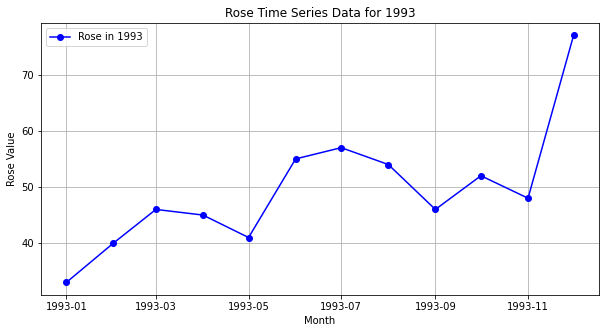

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_1993.index, df_1993['Rose'], marker='o', color='blue', label='Rose in 1993')
plt.title('Rose Time Series Data for 1993')
plt.xlabel('Month')
plt.ylabel('Rose Value')
plt.grid(True)
plt.legend()
plt.show()


## Plot the Data for 1994

In [109]:
# Filter the data for the year 1994 using a boolean mask
df_1994 = df_rose_ti[df_rose_ti.index.year == 1994]
df_1994

,Rose
YearMonth,
1994-01-01,30.0
1994-02-01,35.0
1994-03-01,42.0
1994-04-01,48.0
1994-05-01,44.0
1994-06-01,45.0
1994-07-01,NaN
1994-08-01,NaN
1994-09-01,46.0


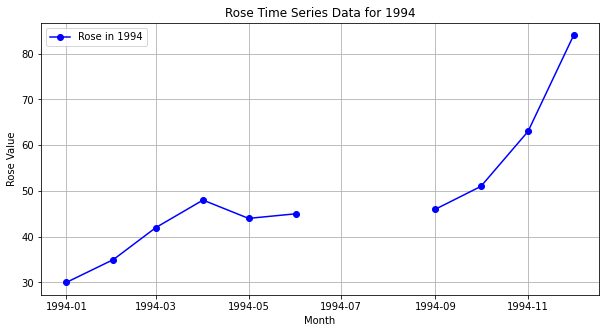

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_1994.index, df_1994['Rose'], marker='o', color='blue', label='Rose in 1994')
plt.title('Rose Time Series Data for 1994')
plt.xlabel('Month')
plt.ylabel('Rose Value')
plt.grid(True)
plt.legend()
plt.show()


## Handling Missing Values

In [111]:
df_rose.head(3)

,YearMonth,Rose
0,1980-01-01,112.0
1,1980-02-01,118.0
2,1980-03-01,129.0


In [112]:
df_rose.set_index('YearMonth', inplace=True)

# Ensure the data has a frequency set (monthly start frequency)
df_rose = df_rose.asfreq('MS')

# Perform linear interpolation
df_interpolated = df_rose.interpolate(method='linear')

# Display the interpolated DataFrame
print(df_interpolated)

             Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
...           ...
1995-03-01   45.0
1995-04-01   52.0
1995-05-01   28.0
1995-06-01   40.0
1995-07-01   62.0

[187 rows x 1 columns]


In [113]:
df_interpolated.columns

Index(['Rose'], dtype='object')

In [114]:
df_rose_inter = df_interpolated.copy()

In [115]:
# # set date as index 
# df_rose_inter = df_interpolated.set_index('YearMonth')
# df_rose_inter

In [116]:
# Filter the data for the year 1994 using a boolean mask
df_1994_inter = df_rose_inter[df_rose_inter.index.year == 1994]
df_1994_inter

,Rose
YearMonth,
1994-01-01,30.000000
1994-02-01,35.000000
1994-03-01,42.000000
1994-04-01,48.000000
1994-05-01,44.000000
1994-06-01,45.000000
1994-07-01,45.333333
1994-08-01,45.666667
1994-09-01,46.000000


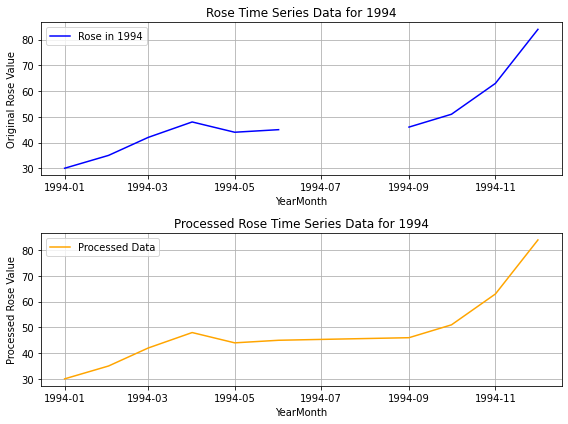

In [117]:
import matplotlib.pyplot as plt

# Create a figure with a specified size
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Original data subplot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
plt.plot(df_1994.index, df_1994['Rose'], color='blue', label='Rose in 1994')
plt.title('Rose Time Series Data for 1994')
plt.xlabel('YearMonth')
plt.ylabel('Original Rose Value')
plt.legend()
plt.grid(True)  # Optional: add gridlines for better readability

# Processed data subplot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
plt.plot(df_1994_inter.index, df_1994_inter['Rose'], label='Processed Data', color='orange')
plt.title('Processed Rose Time Series Data for 1994')
plt.xlabel('YearMonth')
plt.ylabel('Processed Rose Value')
plt.legend()
plt.grid(True)  # Optional: add gridlines for better readability

# Adjust layout to prevent overlap and improve appearance
plt.tight_layout()

# Show the combined figure
plt.show()


# Decomposition

In [118]:
#Decomposition allows us to break down the time series into three components: trend, seasonality, and residuals (noise)

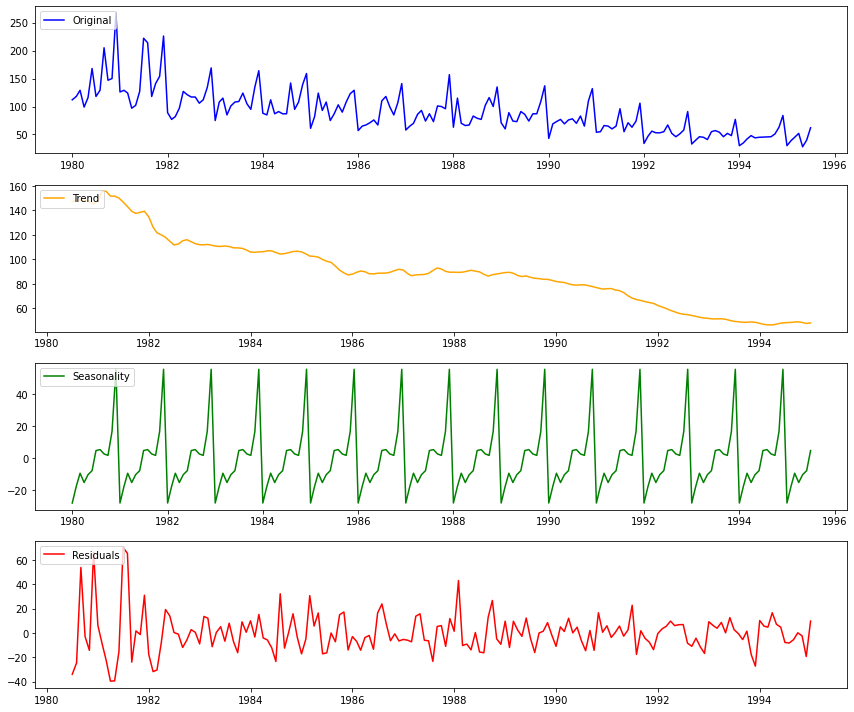

In [119]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform decomposition
decomposition = seasonal_decompose(df_rose_inter['Rose'], model='additive', period=12)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot each component
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(df_rose_inter['Rose'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [120]:
df_rose_inter

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0


# Step 4: Train test Split

In [121]:
# Train-test split (e.g., 80% train, 20% test)
train_size = int(len(df_rose_inter) * 0.8)
train_size

149

In [122]:
test_size = len(df_rose_inter) - train_size
test_size

38

In [123]:
# Get the remaining data points for training
train_data = df_rose_inter.iloc[:-test_size]
train_data

# Get the last 14 data points for testing
test_data = df_rose_inter.iloc[-test_size:]
test_data

,Rose
YearMonth,
1992-06-01,55.000000
1992-07-01,67.000000
1992-08-01,52.000000
1992-09-01,46.000000
1992-10-01,51.000000
1992-11-01,58.000000
1992-12-01,91.000000
1993-01-01,33.000000
1993-02-01,40.000000


In [124]:
df_interpolated

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0


# Build Forecasting Models
1. Linear Regression

In [125]:
train_data

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1992-01-01,34.0
1992-02-01,47.0
1992-03-01,56.0


In [126]:
test_data

,Rose
YearMonth,
1992-06-01,55.000000
1992-07-01,67.000000
1992-08-01,52.000000
1992-09-01,46.000000
1992-10-01,51.000000
1992-11-01,58.000000
1992-12-01,91.000000
1993-01-01,33.000000
1993-02-01,40.000000


In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [128]:
# Prepare the data for linear regression
X_train = np.arange(len(train_data)).reshape(-1, 1)
y_train = train_data.values

X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)

# Build and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
lr_mse = mean_squared_error(test_data, lr_predictions)
lr_mae = mean_absolute_error(test_data, lr_predictions)

print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression MAE: {lr_mae}")


Linear Regression MSE: 188.53262632740578
Linear Regression MAE: 10.293703876960688


## Simple Average

In [129]:
y_hat_avg_ = test_data.copy()

In [130]:
y_hat_avg_['avg_forecast'] = train_data['Rose'].mean()

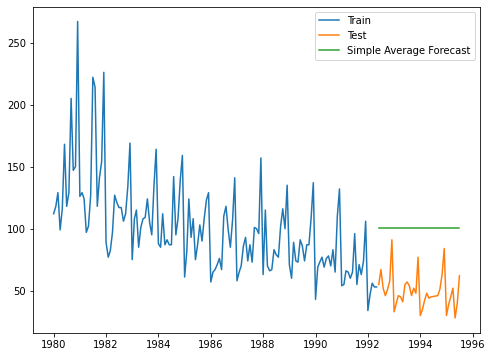

In [131]:
plt.figure(figsize=(8,6))
plt.plot(train_data['Rose'], label='Train')
plt.plot(test_data['Rose'], label='Test')
plt.plot(y_hat_avg_['avg_forecast'], label='Simple Average Forecast')
plt.legend(loc='best')
plt.show()

In [132]:
# Mean Square Error (MSE)
mse_sm = mean_squared_error(test_data.Rose, y_hat_avg_.avg_forecast)
mse_sm = round(mse_sm, 3)
mse_sm

2726.076

In [133]:
y_hat_avg_.avg_forecast

YearMonth
1992-06-01    100.167785
1992-07-01    100.167785
1992-08-01    100.167785
1992-09-01    100.167785
1992-10-01    100.167785
1992-11-01    100.167785
1992-12-01    100.167785
1993-01-01    100.167785
1993-02-01    100.167785
1993-03-01    100.167785
1993-04-01    100.167785
1993-05-01    100.167785
1993-06-01    100.167785
1993-07-01    100.167785
1993-08-01    100.167785
1993-09-01    100.167785
1993-10-01    100.167785
1993-11-01    100.167785
1993-12-01    100.167785
1994-01-01    100.167785
1994-02-01    100.167785
1994-03-01    100.167785
1994-04-01    100.167785
1994-05-01    100.167785
1994-06-01    100.167785
1994-07-01    100.167785
1994-08-01    100.167785
1994-09-01    100.167785
1994-10-01    100.167785
1994-11-01    100.167785
1994-12-01    100.167785
1995-01-01    100.167785
1995-02-01    100.167785
1995-03-01    100.167785
1995-04-01    100.167785
1995-05-01    100.167785
1995-06-01    100.167785
1995-07-01    100.167785
Freq: MS, Name: avg_forecast, dtype: flo

## Moving Average(MA)

In [134]:
df1 = df_rose_inter.copy()

In [135]:
#Grid Search to determine the best rolling window

In [136]:
train_len = len(train_data)

In [137]:
test_data

,Rose
YearMonth,
1992-06-01,55.000000
1992-07-01,67.000000
1992-08-01,52.000000
1992-09-01,46.000000
1992-10-01,51.000000
1992-11-01,58.000000
1992-12-01,91.000000
1993-01-01,33.000000
1993-02-01,40.000000


In [138]:
test_size

38

In [139]:
# Assuming df_rose_inter is your original DataFrame and it's already defined

# Initialize your results list
results = []

for i in range(1, 13):
    # Calculate the moving average with window size i
    df1 = df_rose_inter.copy()
    df1['moving_avg_forecast'] = df1['Rose'].rolling(i).mean()
    
    # Split the data into training and testing sets
    train_len = len(df1) - test_size
    train = df1.iloc[:train_len]
    test = df1.iloc[train_len:]
    
    # Use the moving average from the test data for prediction
    y_hat_avg = test.copy()
    y_hat_avg['moving_avg_forecast'] = df1['moving_avg_forecast'].iloc[train_len:]
    
    # Ensure there are no NaN values in the forecast column
    y_hat_avg = y_hat_avg.dropna(subset=['moving_avg_forecast'])

    # Re-adjust the test data after dropping NaN
    test = test.iloc[-len(y_hat_avg):]

    # Calculate the MSE and MAPE
    mse = mean_squared_error(test['Rose'], y_hat_avg['moving_avg_forecast'])
    abs_error = np.abs(test['Rose'] - y_hat_avg['moving_avg_forecast'])
    mape = np.round(np.mean(abs_error / test['Rose']), 4)
    
    # Print or store the results
    results.append((i, mse, mape))
    print(f'Rolling window: {i}, MSE: {np.round(mse, 2)}, MAPE: {mape}')

# You can convert the results to a DataFrame if needed
results_df = pd.DataFrame(results, columns=['Window Size', 'MSE', 'MAPE'])


Rolling window: 1, MSE: 0.0, MAPE: 0.0
Rolling window: 2, MSE: 88.4, MAPE: 0.1445
Rolling window: 3, MSE: 133.52, MAPE: 0.1894
Rolling window: 4, MSE: 148.36, MAPE: 0.1974
Rolling window: 5, MSE: 144.4, MAPE: 0.1888
Rolling window: 6, MSE: 153.85, MAPE: 0.2038
Rolling window: 7, MSE: 164.36, MAPE: 0.2082
Rolling window: 8, MSE: 160.59, MAPE: 0.2043
Rolling window: 9, MSE: 159.13, MAPE: 0.2005
Rolling window: 10, MSE: 165.59, MAPE: 0.207
Rolling window: 11, MSE: 172.29, MAPE: 0.21
Rolling window: 12, MSE: 176.86, MAPE: 0.2096


## Choosing rolling window as 2 since it gives the less MAPE score

In [140]:
df1['moving_avg_forecast'] = df_rose_inter['Rose'].rolling(2).mean()

In [141]:
train_len

149

In [142]:
#Creating train and test set 
train=df1[0:train_len] 
test=df1[train_len:]

In [143]:
y_hat_avg = test.copy()

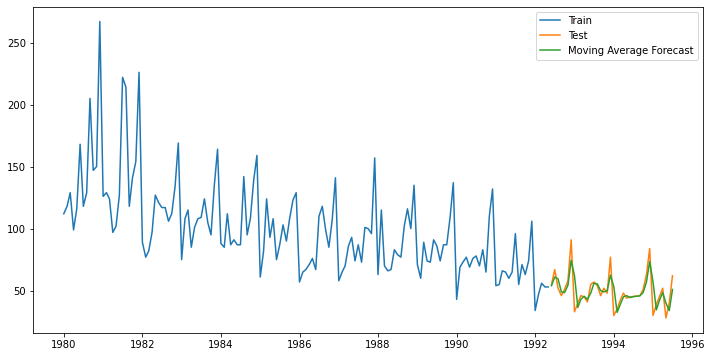

In [144]:
plt.figure(figsize=(12,6))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [145]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Single Exponential Smoothing
ses_model = SimpleExpSmoothing(train_data).fit()
ses_predictions = ses_model.forecast(len(test_data))

# Evaluate the model
ses_mse = mean_squared_error(test_data, ses_predictions)
ses_mae = mean_absolute_error(test_data, ses_predictions)

print(f"Single Exponential Smoothing MSE: {ses_mse}")
print(f"Single Exponential Smoothing MAE: {ses_mae}")

# Double Exponential Smoothing (Holt’s method)
des_model = ExponentialSmoothing(train_data, trend='add').fit()
des_predictions = des_model.forecast(len(test_data))

# Evaluate the model
des_mse = mean_squared_error(test_data, des_predictions)
des_mae = mean_absolute_error(test_data, des_predictions)

print(f"Double Exponential Smoothing MSE: {des_mse}")
print(f"Double Exponential Smoothing MAE: {des_mae}")

# Triple Exponential Smoothing (Holt-Winters method)
tes_model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12).fit()
tes_predictions = tes_model.forecast(len(test_data))

# Evaluate the model
tes_mse = mean_squared_error(test_data, tes_predictions)
tes_mae = mean_absolute_error(test_data, tes_predictions)

print(f"Triple Exponential Smoothing MSE: {tes_mse}")
print(f"Triple Exponential Smoothing MAE: {tes_mae}")



Single Exponential Smoothing MSE: 411.60941066025697
Single Exponential Smoothing MAE: 18.335211081723177
Double Exponential Smoothing MSE: 214.04752485663093
Double Exponential Smoothing MAE: 10.486599749472783
Triple Exponential Smoothing MSE: 192.0705822098962
Triple Exponential Smoothing MAE: 10.437633500923253


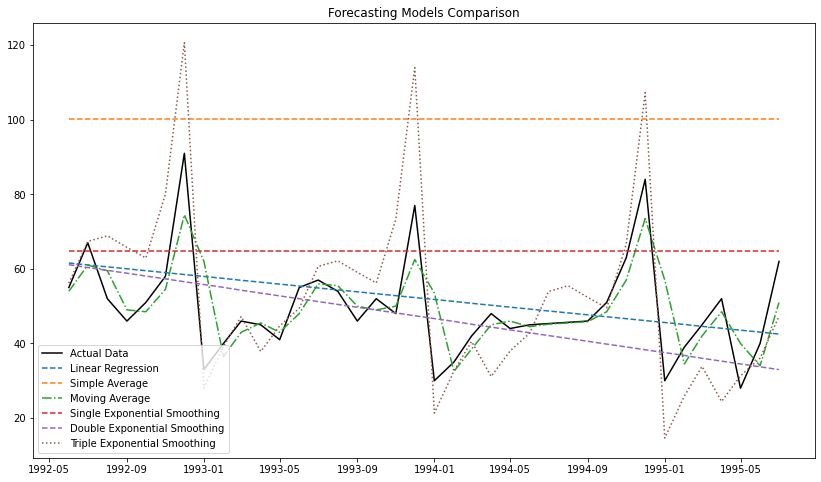

In [146]:
plt.figure(figsize=(14, 8))

# Plot actual data
plt.plot(df_rose_inter.index[-test_size:], df_rose_inter.values[-test_size:], label='Actual Data', color='black')

# Plot predictions
plt.plot(test_data.index, lr_predictions, label='Linear Regression', linestyle='--')
plt.plot(test_data.index, y_hat_avg_['avg_forecast'], label='Simple Average', linestyle='--')
plt.plot(test_data.index, y_hat_avg['moving_avg_forecast'], label='Moving Average', linestyle='-.')
plt.plot(test_data.index, ses_predictions, label='Single Exponential Smoothing', linestyle='--')
plt.plot(test_data.index, des_predictions, label='Double Exponential Smoothing', linestyle='--')
plt.plot(test_data.index, tes_predictions, label='Triple Exponential Smoothing', linestyle=':')

plt.legend()
plt.title('Forecasting Models Comparison')
plt.show()


In [147]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def obtain_adf_results(timeseries, max_d):
    """
    Perform the ADF test on a time series after applying differencing up to max_d times.

    Args:
        timeseries (pd.Series): Univariate time series data.
        max_d (int): Maximum number of differencing operations to apply.

    Returns:
        pd.DataFrame: DataFrame showing the ADF statistics and p-values for each level of differencing.
    """
    
    results = []

    for d in range(max_d + 1):
        # Perform ADF test
        adf_result = adfuller(timeseries, autolag='AIC')
        p_value = adf_result[1]
        
        # Store results
        results.append((d, adf_result[0], p_value))
        
        # Apply differencing
        timeseries = timeseries.diff().dropna()
    
    # Construct DataFrame
    results_df = pd.DataFrame(results, columns=['d', 'ADF Statistic', 'p-value'])
    
    return results_df


In [148]:
# Example usage of the function
results_df = obtain_adf_results(df_rose_inter['Rose'], max_d=3)
print(results_df)


   d  ADF Statistic       p-value
0  0      -1.876699  3.431007e-01
1  1      -8.044392  1.810895e-12
2  2     -10.353110  2.506672e-18
3  3     -11.066052  4.678766e-20


In [149]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def obtain_adf_kpss_results(timeseries, max_d):
    """ Build dataframe with ADF statistics and p-value for time series after applying difference on time series
    
    Args:
        time_series (df): Dataframe of univariate time series  
        max_d (int): Max value of how many times apply difference
        
    Return:
        Dataframe showing values of ADF statistics and p when applying ADF test after applying d times 
        differencing on a time-series.
    
    """
    
    results=[]

    for idx in range(max_d):
        adf_result = adfuller(timeseries, autolag='AIC')
        kpss_result = kpss(timeseries, regression='c', nlags="auto")
        timeseries = timeseries.diff().dropna()
        if adf_result[1] <=0.05:
            adf_stationary = True
        else:
            adf_stationary = False
        if kpss_result[1] <=0.05:
            kpss_stationary = False
        else:
            kpss_stationary = True
            
        stationary = adf_stationary & kpss_stationary
            
        results.append((idx,adf_result[1], kpss_result[1],adf_stationary,kpss_stationary, stationary))
    
    # Construct DataFrame 
    results_df = pd.DataFrame(results, columns=['d','adf_stats','p-value', 'is_adf_stationary','is_kpss_stationary','is_stationary' ])
    
    return results_df

In [150]:
# Example usage of the function
results_df_check = obtain_adf_kpss_results(df_rose_inter['Rose'], max_d=3)
results_df_check


,d,adf_stats,p-value,is_adf_stationary,is_kpss_stationary,is_stationary
0,0,3.431007e-01,0.01,False,False,False
1,1,1.810895e-12,0.10,True,True,True
2,2,2.506672e-18,0.10,True,True,True


In [151]:
train_len

149

In [152]:
test_size

38

In [153]:
tr_data = df_rose_inter[:-test_size]
te_data = df_rose_inter[-test_size:]

In [154]:
tr_data

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1992-01-01,34.0
1992-02-01,47.0
1992-03-01,56.0


In [155]:
te_data

,Rose
YearMonth,
1992-06-01,55.000000
1992-07-01,67.000000
1992-08-01,52.000000
1992-09-01,46.000000
1992-10-01,51.000000
1992-11-01,58.000000
1992-12-01,91.000000
1993-01-01,33.000000
1993-02-01,40.000000


In [156]:
df_rose_inter_sta = df_rose_inter.diff().dropna()
df_rose_inter_sta

,Rose
YearMonth,
1980-02-01,6.0
1980-03-01,11.0
1980-04-01,-30.0
1980-05-01,17.0
1980-06-01,52.0
...,...
1995-03-01,6.0
1995-04-01,7.0
1995-05-01,-24.0


## ACF and PACF plot to identify the value of P,Q

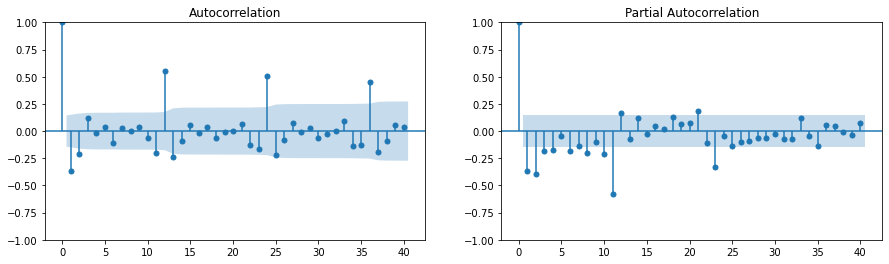

In [157]:
# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(df_rose_inter_sta['Rose'], lags=40, ax=axes[0])
plot_pacf(df_rose_inter_sta['Rose'], lags=40, ax=axes[1])
plt.show()

In [158]:
tr_data_st = df_rose_inter_sta[:-test_size]
te_data_st = df_rose_inter_sta[-test_size:]
te_data_st

,Rose
YearMonth,
1992-06-01,2.000000
1992-07-01,12.000000
1992-08-01,-15.000000
1992-09-01,-6.000000
1992-10-01,5.000000
1992-11-01,7.000000
1992-12-01,33.000000
1993-01-01,-58.000000
1993-02-01,7.000000


In [159]:
#ARIMA MODEL

In [160]:
!pip install pmdarima
import pmdarima

from pmdarima import auto_arima

Defaulting to user installation because normal site-packages is not writeable


In [161]:
auto_arima(tr_data_st, test='adf',seasonal= True, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1501.162, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1482.523, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1499.179, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1459.778, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1457.898, Time=0.12 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1455.516, Time=0.17 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=1457.309, Time=0.27 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1453.702, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1456.024, Time=0.11 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1455.510, Time=0

ARIMA(order=(2, 0, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [162]:
from statsmodels.tsa.arima.model import ARIMA

In [163]:
arima_model = ARIMA(tr_data_st, order=(2, 0, 3))
# fit model
arima_results = arima_model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(arima_results.resid))

# Print mean absolute error
print('MAE: %.3f' % mae)

MAE: 21.280


In [164]:
pre_arima_results = arima_results.predict(start=-30, dynamic=True)
pre_arima_results

YearMonth
1989-12-01    -8.152433
1990-01-01   -41.222211
1990-02-01    26.771671
1990-03-01   -19.044889
1990-04-01    12.279625
1990-05-01    -9.560828
1990-06-01     6.059346
1990-07-01    -5.468005
1990-08-01     3.353668
1990-09-01    -3.667150
1990-10-01     2.143387
1990-11-01    -2.842687
1990-12-01     1.571319
1991-01-01    -2.436064
1991-02-01     1.273466
1991-03-01    -2.210030
1991-04-01     1.095151
1991-05-01    -2.063707
1991-06-01     0.970548
1991-07-01    -1.954106
1991-08-01     0.871548
1991-09-01    -1.862815
1991-10-01     0.786059
1991-11-01    -1.781865
1991-12-01     0.708801
1992-01-01    -1.707725
1992-02-01     0.637386
1992-03-01    -1.638758
1992-04-01     0.570667
1992-05-01    -1.574139
Freq: MS, Name: predicted_mean, dtype: float64

In [165]:
# Forecast future values 
forecast_periods = test_size  # Forecast the 
forecast = arima_results.get_forecast(steps=forecast_periods) 
forecast

In [166]:
forecast_mean_arima = forecast.predicted_mean
forecast_mean_arima

1992-06-01     1.776045
1992-07-01    10.343743
1992-08-01    -7.548124
1992-09-01     4.018477
1992-10-01    -3.430031
1992-11-01     1.338205
1992-12-01    -1.686378
1993-01-01     0.204655
1993-02-01    -0.950220
1993-03-01    -0.272682
1993-04-01    -0.641429
1993-05-01    -0.471734
1993-06-01    -0.513807
1993-07-01    -0.552881
1993-08-01    -0.462878
1993-09-01    -0.584181
1993-10-01    -0.444312
1993-11-01    -0.594504
1993-12-01    -0.439307
1994-01-01    -0.596096
1994-02-01    -0.439891
1994-03-01    -0.594141
1994-04-01    -0.442693
1994-05-01    -0.590832
1994-06-01    -0.446289
1994-07-01    -0.587091
1994-08-01    -0.450084
1994-09-01    -0.583300
1994-10-01    -0.453834
1994-11-01    -0.579615
1994-12-01    -0.457441
1995-01-01    -0.576093
1995-02-01    -0.460872
1995-03-01    -0.572754
1995-04-01    -0.464120
1995-05-01    -0.569597
1995-06-01    -0.467186
1995-07-01    -0.566619
Freq: MS, Name: predicted_mean, dtype: float64

In [167]:
test_data

,Rose
YearMonth,
1992-06-01,55.000000
1992-07-01,67.000000
1992-08-01,52.000000
1992-09-01,46.000000
1992-10-01,51.000000
1992-11-01,58.000000
1992-12-01,91.000000
1993-01-01,33.000000
1993-02-01,40.000000


In [168]:
train_data

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1992-01-01,34.0
1992-02-01,47.0
1992-03-01,56.0


In [169]:
forecast_mean_arima

1992-06-01     1.776045
1992-07-01    10.343743
1992-08-01    -7.548124
1992-09-01     4.018477
1992-10-01    -3.430031
1992-11-01     1.338205
1992-12-01    -1.686378
1993-01-01     0.204655
1993-02-01    -0.950220
1993-03-01    -0.272682
1993-04-01    -0.641429
1993-05-01    -0.471734
1993-06-01    -0.513807
1993-07-01    -0.552881
1993-08-01    -0.462878
1993-09-01    -0.584181
1993-10-01    -0.444312
1993-11-01    -0.594504
1993-12-01    -0.439307
1994-01-01    -0.596096
1994-02-01    -0.439891
1994-03-01    -0.594141
1994-04-01    -0.442693
1994-05-01    -0.590832
1994-06-01    -0.446289
1994-07-01    -0.587091
1994-08-01    -0.450084
1994-09-01    -0.583300
1994-10-01    -0.453834
1994-11-01    -0.579615
1994-12-01    -0.457441
1995-01-01    -0.576093
1995-02-01    -0.460872
1995-03-01    -0.572754
1995-04-01    -0.464120
1995-05-01    -0.569597
1995-06-01    -0.467186
1995-07-01    -0.566619
Freq: MS, Name: predicted_mean, dtype: float64

In [170]:
test_data.index

DatetimeIndex(['1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01',
               '1992-10-01', '1992-11-01', '1992-12-01', '1993-01-01',
               '1993-02-01', '1993-03-01', '1993-04-01', '1993-05-01',
               '1993-06-01', '1993-07-01', '1993-08-01', '1993-09-01',
               '1993-10-01', '1993-11-01', '1993-12-01', '1994-01-01',
               '1994-02-01', '1994-03-01', '1994-04-01', '1994-05-01',
               '1994-06-01', '1994-07-01', '1994-08-01', '1994-09-01',
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', freq='MS')

In [171]:
# Get the last actual value
last_actual_value = train_data['Rose'].iloc[-1]
last_actual_value

53.0

In [172]:
# Get the last actual value
last_actual_value = train_data['Rose'].iloc[-1]

# Initialize the forecasted values list with the last actual value
forecasted_values = [last_actual_value]  # last value of actual data before difference

# Iteratively add the forecasted differenced values to the last actual value
for diff in forecast_mean_arima:  # forcast value of differentiate value
    new_value = forecasted_values[-1] + diff
    forecasted_values.append(new_value)

# Remove the initial actual value (last value of actual data)
forecasted_values_ = forecasted_values[1:]


# forecast_dates = test_data.index  #forcast value date index
actual_values_ = test_data['Rose']
# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({ 'actual_rose': actual_values_, 'forecasted_rose': forecasted_values_})

# Print the DataFrame
forecast_df

,actual_rose,forecasted_rose
YearMonth,,
1992-06-01,55.000000,54.776045
1992-07-01,67.000000,65.119789
1992-08-01,52.000000,57.571664
1992-09-01,46.000000,61.590141
1992-10-01,51.000000,58.160110
1992-11-01,58.000000,59.498315
1992-12-01,91.000000,57.811938
1993-01-01,33.000000,58.016593
1993-02-01,40.000000,57.066373


In [173]:
# Calculate MAE and MSE
mae = mean_absolute_error(forecast_df['actual_rose'], forecast_df['forecasted_rose'])
mse = mean_squared_error(forecast_df['actual_rose'], forecast_df['forecasted_rose'])

print(f"Mean Absolute Error (MAE) of arima process: {mae}")
print(f"Mean Squared Error (MSE) of arima process: {mse}")


Mean Absolute Error (MAE) of arima process: 9.882460666787376
Mean Squared Error (MSE) of arima process: 186.4414403219954


## Fit the Sarima model

In [174]:
import pmdarima as pm

# Create auto_arima model
model1 = pm.auto_arima(tr_data_st, #time series
                      seasonal=True, # is the time series seasonal
                      m= 12, # the seasonal period - 
                      d=0, # non-seasonal difference order
                      D=0, # seasonal difference order
                      max_p=12, # max value of p to test 
                      max_q=12, # max value of p to test
                      max_P=3, # max value of P to test 
                      max_Q=3, # max value of Q to test 
                      information_criterion='aic', # used to select best mode
                      trace=True, # prints the information_criterion for each model it fits
                      error_action='ignore', # ignore orders that don't work
                      stepwise=True, # apply an intelligent order search
                      suppress_warnings=True) 

# Print model summary
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.60 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1501.162, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1425.693, Time=0.27 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1499.179, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1482.523, Time=0.06 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1404.696, Time=2.30 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=inf, Time=4.68 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=1397.196, Time=5.62 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1395.448, Time=0.66 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1449.940, Time=0.31 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=1397.267, Time=3.53 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=1432.123, Time=2.39 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=6.70 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : 

In [201]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


## Best model:  ARIMA(5,0,1)(2,0,1)[12] 

In [177]:
sarima_02_model = SARIMAX(tr_data_st, order=(5,0,1), seasonal_order=(2,0,1,12))
sarima_02_results = sarima_02_model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(sarima_02_results.resid))

# Print mean absolute error
print('MAE: %.3f' % mae)

MAE: 15.941


In [178]:
pre_sarima_results = sarima_02_results.predict(start=-30, dynamic=True)
pre_sarima_results

YearMonth
1989-12-01    31.802932
1990-01-01   -86.618066
1990-02-01    13.178557
1990-03-01     5.137119
1990-04-01    -8.627553
1990-05-01     6.630497
1990-06-01     2.675752
1990-07-01     7.216494
1990-08-01     2.317907
1990-09-01     1.354441
1990-10-01     1.462788
1990-11-01    10.806881
1990-12-01    35.923687
1991-01-01   -80.631121
1991-02-01    11.212531
1991-03-01     5.399425
1991-04-01    -8.545907
1991-05-01     6.054624
1991-06-01     2.977423
1991-07-01     7.125770
1991-08-01     2.167295
1991-09-01     1.411086
1991-10-01     1.419803
1991-11-01    10.666799
1991-12-01    35.410734
1992-01-01   -79.487339
1992-02-01    11.054357
1992-03-01     5.323355
1992-04-01    -8.424488
1992-05-01     5.968868
Freq: MS, Name: predicted_mean, dtype: float64

In [179]:
# Forecast future values 
forecast_periods = test_size  # Forecast the test_size number of data points 
forecast_sarima = sarima_02_results.get_forecast(steps=forecast_periods) 
forecast_sarima

In [180]:
forecast_mean_sarima = forecast_sarima.predicted_mean
forecast_mean_sarima

1992-06-01     3.703702
1992-07-01    11.163772
1992-08-01    -8.127325
1992-09-01     6.235191
1992-10-01    -3.511357
1992-11-01    15.928539
1992-12-01    31.563796
1993-01-01   -77.367661
1993-02-01    11.256257
1993-03-01     6.720635
1993-04-01    -4.473418
1993-05-01     1.139985
1993-06-01     3.902117
1993-07-01    10.855934
1993-08-01    -8.012900
1993-09-01     6.076824
1993-10-01    -3.496937
1993-11-01    15.735931
1993-12-01    31.098872
1994-01-01   -76.240684
1994-02-01    11.103111
1994-03-01     6.624025
1994-04-01    -4.404336
1994-05-01     1.122158
1994-06-01     3.844359
1994-07-01    10.700429
1994-08-01    -7.897518
1994-09-01     5.989324
1994-10-01    -3.446408
1994-11-01    15.509429
1994-12-01    30.651395
1995-01-01   -75.143706
1995-02-01    10.943325
1995-03-01     6.528709
1995-04-01    -4.340970
1995-05-01     1.106013
1995-06-01     3.789048
1995-07-01    10.546466
Freq: MS, Name: predicted_mean, dtype: float64

In [181]:
forecast_mean_sarima

1992-06-01     3.703702
1992-07-01    11.163772
1992-08-01    -8.127325
1992-09-01     6.235191
1992-10-01    -3.511357
1992-11-01    15.928539
1992-12-01    31.563796
1993-01-01   -77.367661
1993-02-01    11.256257
1993-03-01     6.720635
1993-04-01    -4.473418
1993-05-01     1.139985
1993-06-01     3.902117
1993-07-01    10.855934
1993-08-01    -8.012900
1993-09-01     6.076824
1993-10-01    -3.496937
1993-11-01    15.735931
1993-12-01    31.098872
1994-01-01   -76.240684
1994-02-01    11.103111
1994-03-01     6.624025
1994-04-01    -4.404336
1994-05-01     1.122158
1994-06-01     3.844359
1994-07-01    10.700429
1994-08-01    -7.897518
1994-09-01     5.989324
1994-10-01    -3.446408
1994-11-01    15.509429
1994-12-01    30.651395
1995-01-01   -75.143706
1995-02-01    10.943325
1995-03-01     6.528709
1995-04-01    -4.340970
1995-05-01     1.106013
1995-06-01     3.789048
1995-07-01    10.546466
Freq: MS, Name: predicted_mean, dtype: float64

In [182]:
test_data

,Rose
YearMonth,
1992-06-01,55.000000
1992-07-01,67.000000
1992-08-01,52.000000
1992-09-01,46.000000
1992-10-01,51.000000
1992-11-01,58.000000
1992-12-01,91.000000
1993-01-01,33.000000
1993-02-01,40.000000


In [183]:
train_data

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1992-01-01,34.0
1992-02-01,47.0
1992-03-01,56.0


In [184]:
forecast_mean_sarima

1992-06-01     3.703702
1992-07-01    11.163772
1992-08-01    -8.127325
1992-09-01     6.235191
1992-10-01    -3.511357
1992-11-01    15.928539
1992-12-01    31.563796
1993-01-01   -77.367661
1993-02-01    11.256257
1993-03-01     6.720635
1993-04-01    -4.473418
1993-05-01     1.139985
1993-06-01     3.902117
1993-07-01    10.855934
1993-08-01    -8.012900
1993-09-01     6.076824
1993-10-01    -3.496937
1993-11-01    15.735931
1993-12-01    31.098872
1994-01-01   -76.240684
1994-02-01    11.103111
1994-03-01     6.624025
1994-04-01    -4.404336
1994-05-01     1.122158
1994-06-01     3.844359
1994-07-01    10.700429
1994-08-01    -7.897518
1994-09-01     5.989324
1994-10-01    -3.446408
1994-11-01    15.509429
1994-12-01    30.651395
1995-01-01   -75.143706
1995-02-01    10.943325
1995-03-01     6.528709
1995-04-01    -4.340970
1995-05-01     1.106013
1995-06-01     3.789048
1995-07-01    10.546466
Freq: MS, Name: predicted_mean, dtype: float64

In [185]:
# Get the last actual value
last_actual_value = train_data['Rose'].iloc[-1]

# Initialize the forecasted values list with the last actual value
forecasted_values = [last_actual_value]  # last value of actual data before difference

# Iteratively add the forecasted differenced values to the last actual value
for diff in forecast_mean_sarima:  # forcast value of differentiate value
    new_value = forecasted_values[-1] + diff
    forecasted_values.append(new_value)

# Remove the initial actual value (last value of actual data)
forecasted_values_ = forecasted_values[1:]


# forecast_dates = test_data.index  #forcast value date index
actual_values_ = test_data['Rose']
# Create a DataFrame for the forecasted values
forecast_df_sarima = pd.DataFrame({ 'actual_rose': actual_values_, 'forecasted_rose': forecasted_values_})

# Print the DataFrame
forecast_df_sarima

,actual_rose,forecasted_rose
YearMonth,,
1992-06-01,55.000000,56.703702
1992-07-01,67.000000,67.867474
1992-08-01,52.000000,59.740149
1992-09-01,46.000000,65.975340
1992-10-01,51.000000,62.463983
1992-11-01,58.000000,78.392522
1992-12-01,91.000000,109.956318
1993-01-01,33.000000,32.588657
1993-02-01,40.000000,43.844914


In [197]:
forecast_df

,actual_rose,forecasted_rose
YearMonth,,
1992-06-01,55.000000,54.776045
1992-07-01,67.000000,65.119789
1992-08-01,52.000000,57.571664
1992-09-01,46.000000,61.590141
1992-10-01,51.000000,58.160110
1992-11-01,58.000000,59.498315
1992-12-01,91.000000,57.811938
1993-01-01,33.000000,58.016593
1993-02-01,40.000000,57.066373


In [198]:
forecast_df_sarima

,actual_rose,forecasted_rose
YearMonth,,
1992-06-01,55.000000,56.703702
1992-07-01,67.000000,67.867474
1992-08-01,52.000000,59.740149
1992-09-01,46.000000,65.975340
1992-10-01,51.000000,62.463983
1992-11-01,58.000000,78.392522
1992-12-01,91.000000,109.956318
1993-01-01,33.000000,32.588657
1993-02-01,40.000000,43.844914


In [186]:
# plot the data with forcast value

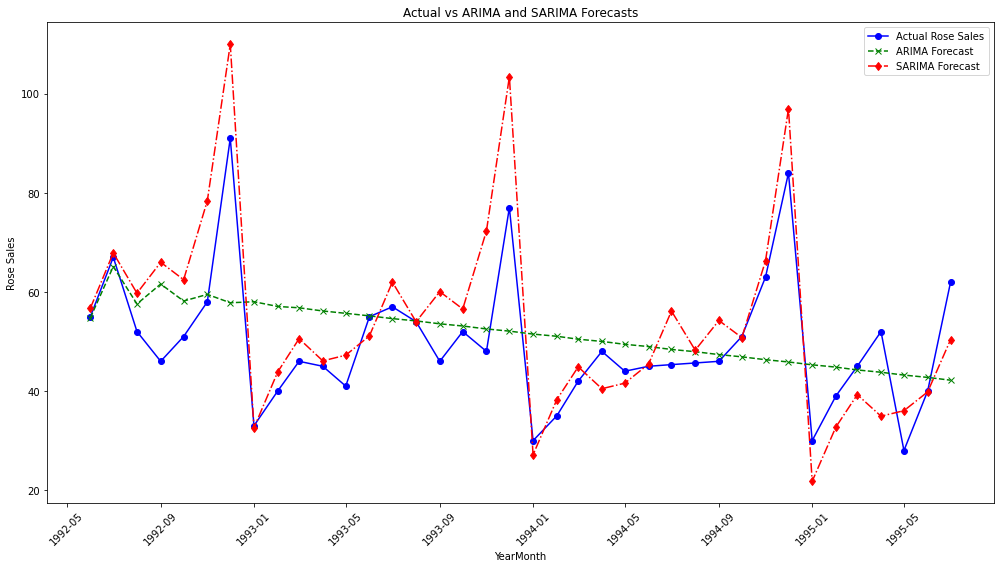

In [199]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming forecast_df and forecast_df_sarima are already defined DataFrames

# Plotting the actual data, ARIMA forecast, and SARIMA forecast
plt.figure(figsize=(14, 8))

# Plot actual rose sales
plt.plot(forecast_df.index, forecast_df['actual_rose'], label='Actual Rose Sales', color='blue', marker='o')

# Plot ARIMA forecasted sales
plt.plot(forecast_df.index, forecast_df['forecasted_rose'], label='ARIMA Forecast', color='green', linestyle='--', marker='x')

# Plot SARIMA forecasted sales
plt.plot(forecast_df_sarima.index, forecast_df_sarima['forecasted_rose'], label='SARIMA Forecast', color='red', linestyle='-.', marker='d')

# Adding title and labels
plt.title('Actual vs ARIMA and SARIMA Forecasts')
plt.xlabel('YearMonth')
plt.ylabel('Rose Sales')
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [187]:
# Calculate MAE and MSE
mae = mean_absolute_error(forecast_df_sarima['actual_rose'], forecast_df_sarima['forecasted_rose'])
mse = mean_squared_error(forecast_df_sarima['actual_rose'], forecast_df_sarima['forecasted_rose'])

print(f"Mean Absolute Error (MAE) of sarima process: {mae}")
print(f"Mean Squared Error (MSE) of sarima process: {mse}")


Mean Absolute Error (MAE) of sarima process: 7.629489002836884
Mean Squared Error (MSE) of sarima process: 107.3498108948925


# Above all models sarima gives least mse 

In [188]:
# Taking the whole interpolated data for forcasting next 12 months

In [189]:
df_rose_inter

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0


In [190]:
# Example usage of the function
results_df = obtain_adf_results(df_rose_inter['Rose'], max_d=3)
print(results_df)

   d  ADF Statistic       p-value
0  0      -1.876699  3.431007e-01
1  1      -8.044392  1.810895e-12
2  2     -10.353110  2.506672e-18
3  3     -11.066052  4.678766e-20


In [191]:
# for d = 0 the data is stationary so make the data first order difference to make the data stationary

In [192]:
data = df_rose_inter.diff().dropna()
data

,Rose
YearMonth,
1980-02-01,6.0
1980-03-01,11.0
1980-04-01,-30.0
1980-05-01,17.0
1980-06-01,52.0
...,...
1995-03-01,6.0
1995-04-01,7.0
1995-05-01,-24.0


In [193]:
# Example usage of the function
results_df_ = obtain_adf_results(data['Rose'], max_d=3)
print(results_df_)

   d  ADF Statistic       p-value
0  0      -8.044392  1.810895e-12
1  1     -10.353110  2.506672e-18
2  2     -11.066052  4.678766e-20
3  3     -11.371092  8.975584e-21


In [194]:
# the data becomes stationary

In [195]:
data

,Rose
YearMonth,
1980-02-01,6.0
1980-03-01,11.0
1980-04-01,-30.0
1980-05-01,17.0
1980-06-01,52.0
...,...
1995-03-01,6.0
1995-04-01,7.0
1995-05-01,-24.0


In [196]:
import pmdarima as pm

# Create auto_arima model
model_final = pm.auto_arima(data, #time series
                      seasonal=True, # is the time series seasonal
                      m= 12, # the seasonal period - one week?
                      d=0, # non-seasonal difference order
                      D=0, # seasonal difference order
                      max_p=12, # max value of p to test 
                      max_q=12, # max value of p to test
                      max_P=3, # max value of P to test 
                      max_Q=3, # max value of Q to test 
                      information_criterion='aic', # used to select best mode
                      trace=True, # prints the information_criterion for each model it fits
                      error_action='ignore', # ignore orders that don't work
                      stepwise=True, # apply an intelligent order search
                      suppress_warnings=True) 

# Print model summary
print(model_final.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1854.379, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1750.263, Time=0.31 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1852.390, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1830.080, Time=0.07 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1722.328, Time=1.83 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=inf, Time=4.01 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=1712.275, Time=3.91 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1710.730, Time=0.52 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1784.836, Time=0.27 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=1712.364, Time=3.92 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=1759.833, Time=1.93 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=7.73 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : 

## Best model:  ARIMA(4,0,2)(1,0,1)[12] 

In [200]:
sarima_model = SARIMAX(data, order=(4,0,2), seasonal_order=(1,0,1,12))
sarima_results = sarima_model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(sarima_results.resid))

# Print mean absolute error
print('MAE: %.3f' % mae)

MAE: 14.038


In [201]:
# Forecast future values 
forecast_periods = 12  # Forecast the next 12 months
forecast_sarima_ = sarima_results.get_forecast(steps=forecast_periods) 
forecast_sarima_

In [202]:
forecast_mean_sarima_ = forecast_sarima_.predicted_mean
forecast_mean_sarima_

1995-08-01   -18.484587
1995-09-01    -0.421705
1995-10-01     2.345974
1995-11-01     9.049435
1995-12-01    28.045958
1996-01-01   -60.938772
1996-02-01     8.644565
1996-03-01     6.293456
1996-04-01     0.696960
1996-05-01    -6.324866
1996-06-01     6.223788
1996-07-01    10.104503
Freq: MS, Name: predicted_mean, dtype: float64

In [203]:
forcast_date = forecast_mean_sarima_.index
forcast_date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [204]:
df_rose_inter

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0


In [205]:
# Get the last actual value
last_actual_value = df_rose_inter['Rose'].iloc[-1]

# Initialize the forecasted values list with the last actual value
forecasted_values = [last_actual_value]  # last value of actual data before difference

# Iteratively add the forecasted differenced values to the last actual value
for diff in forecast_mean_sarima_:  # forcast value of differentiate value
    new_value = forecasted_values[-1] + diff
    forecasted_values.append(new_value)

# Remove the initial actual value (last value of actual data)
forecasted_values_ = forecasted_values[1:]

# Create a DataFrame for the forecasted values
forecast_df_sarima = pd.DataFrame({ 'forcasted_date': forcast_date, 'forecasted_rose': forecasted_values_})

# Print the DataFrame
forecast_df_sarima

,forcasted_date,forecasted_rose
0,1995-08-01,43.515413
1,1995-09-01,43.093708
2,1995-10-01,45.439682
3,1995-11-01,54.489117
4,1995-12-01,82.535075
5,1996-01-01,21.596303
6,1996-02-01,30.240869
7,1996-03-01,36.534325
8,1996-04-01,37.231285
9,1996-05-01,30.906419


In [206]:
forecast_df_sarima.to_csv("ARIMA_(4,0,2)_(1,0,1)_[12].csv",index = False)